In [1]:
from keras.optimizers import Nadam
from keras.losses import KLDivergence

from utils import prepare_data, set_variables
from plotting import plot_line_graph
from metrics import pearson, Pearson
from models import MultiBranch
from keras.metrics import CategoricalCrossentropy, KLDivergence
from keras.losses import CategoricalCrossentropy as LossCategoricalCrossentropy

2023-07-07 14:23:50.969174: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 14:23:51.111974: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 14:23:51.113798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 14:23:52.433151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = "CNN_architecture10" #'branched1'

model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_branches, params_consensus, params_train , params_train_for_compile= set_variables(model_name, max_seq_len, multibranch=True)

Add s
Add d
Add p
Add f
Add s
Add d
Add p
Add f


2023-07-07 14:24:30.857398: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 565641216 exceeds 10% of free system memory.
2023-07-07 14:24:31.001455: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 565641216 exceeds 10% of free system memory.
2023-07-07 14:24:31.155738: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 565641216 exceeds 10% of free system memory.


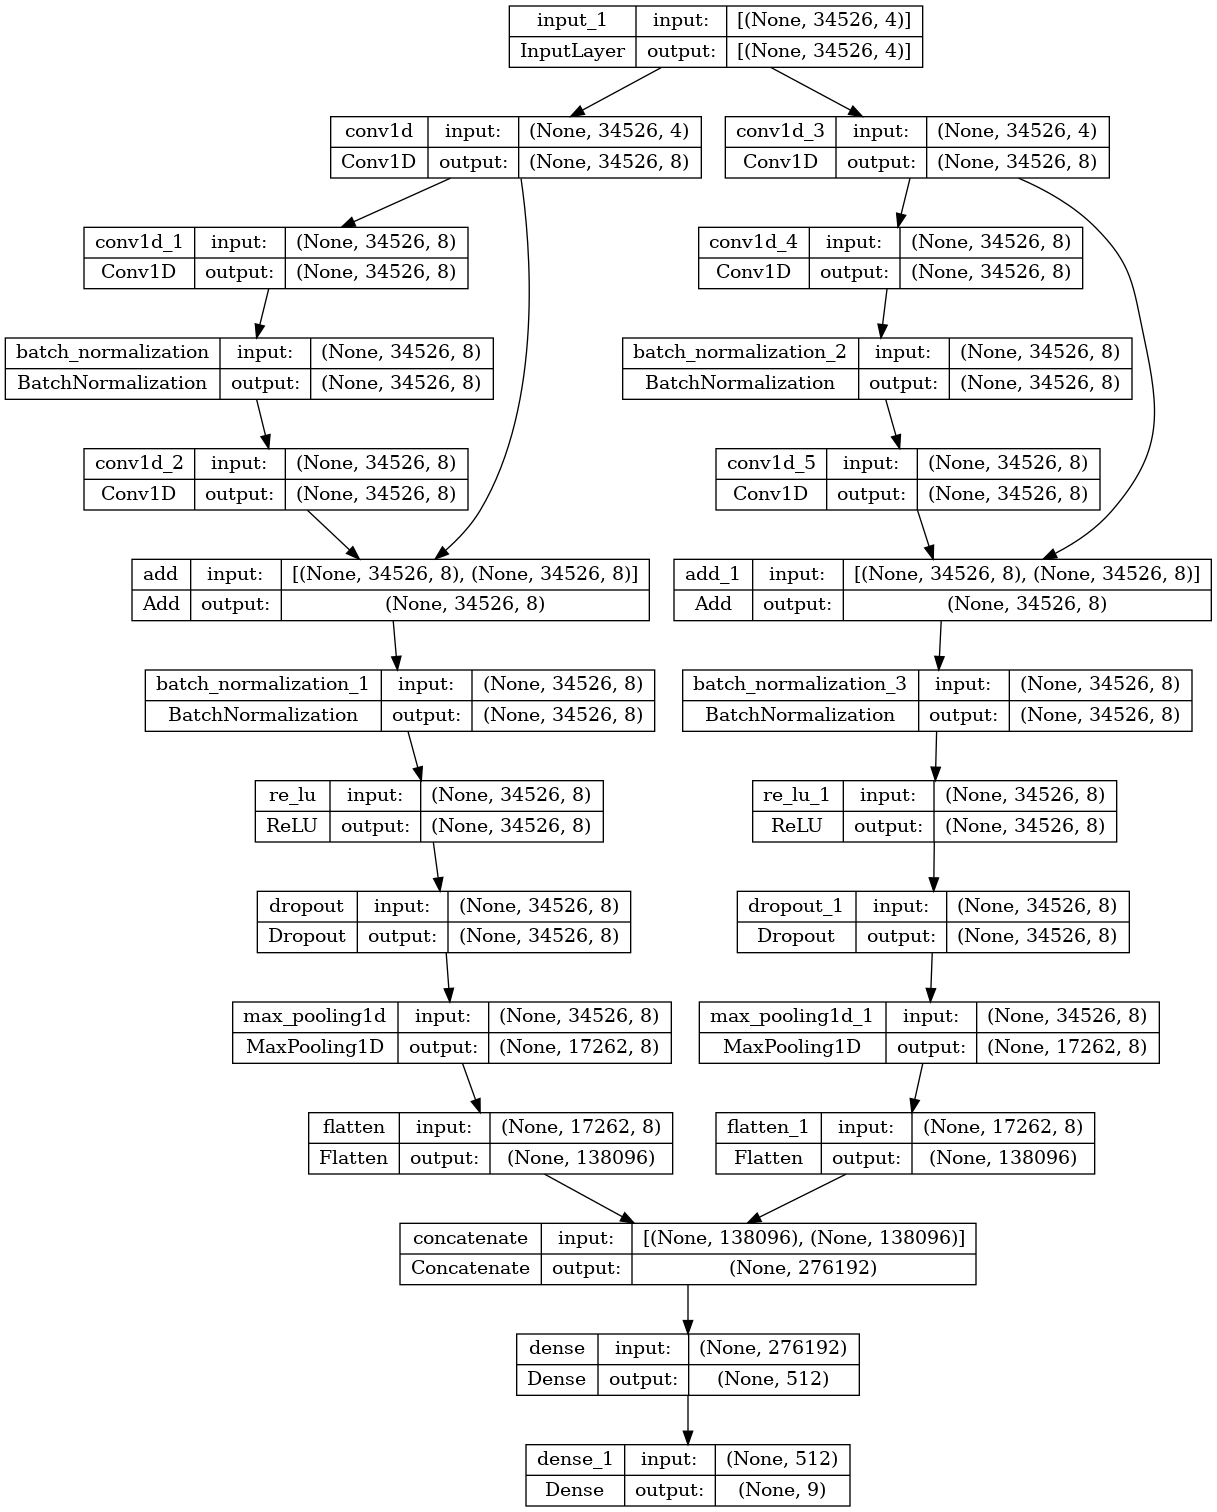

In [4]:
optim = Nadam(learning_rate=float(params_train_for_compile["learning_rate"]))

model = MultiBranch(input_size=(max_seq_len, 4),
                    param_branches=params_branches,
                    number_branches=2, 
                    param_consensus=params_consensus,
                    optimizer=optim,
                    loss= LossCategoricalCrossentropy(), #KLDivergence(),
                    metrics=[pearson, Pearson(name="class_pearson"), KLDivergence(name="kullback_leibler_divergence"), "accuracy"],
                    )

model.print_model()
# model.summary() #if information about number of params needed


In [5]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data, 
                                 params_train_dataLoader=params_dataLoader_train, 
                                 params_eval_dataLoader=params_dataLoader_valid, 
                                 params_train=params_train)

Epoch 1/80


2023-07-07 14:24:39.510938: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-07 14:24:39.867859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 565641216 exceeds 10% of free system memory.
2023-07-07 14:24:39.949061: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 565641216 exceeds 10% of free system memory.


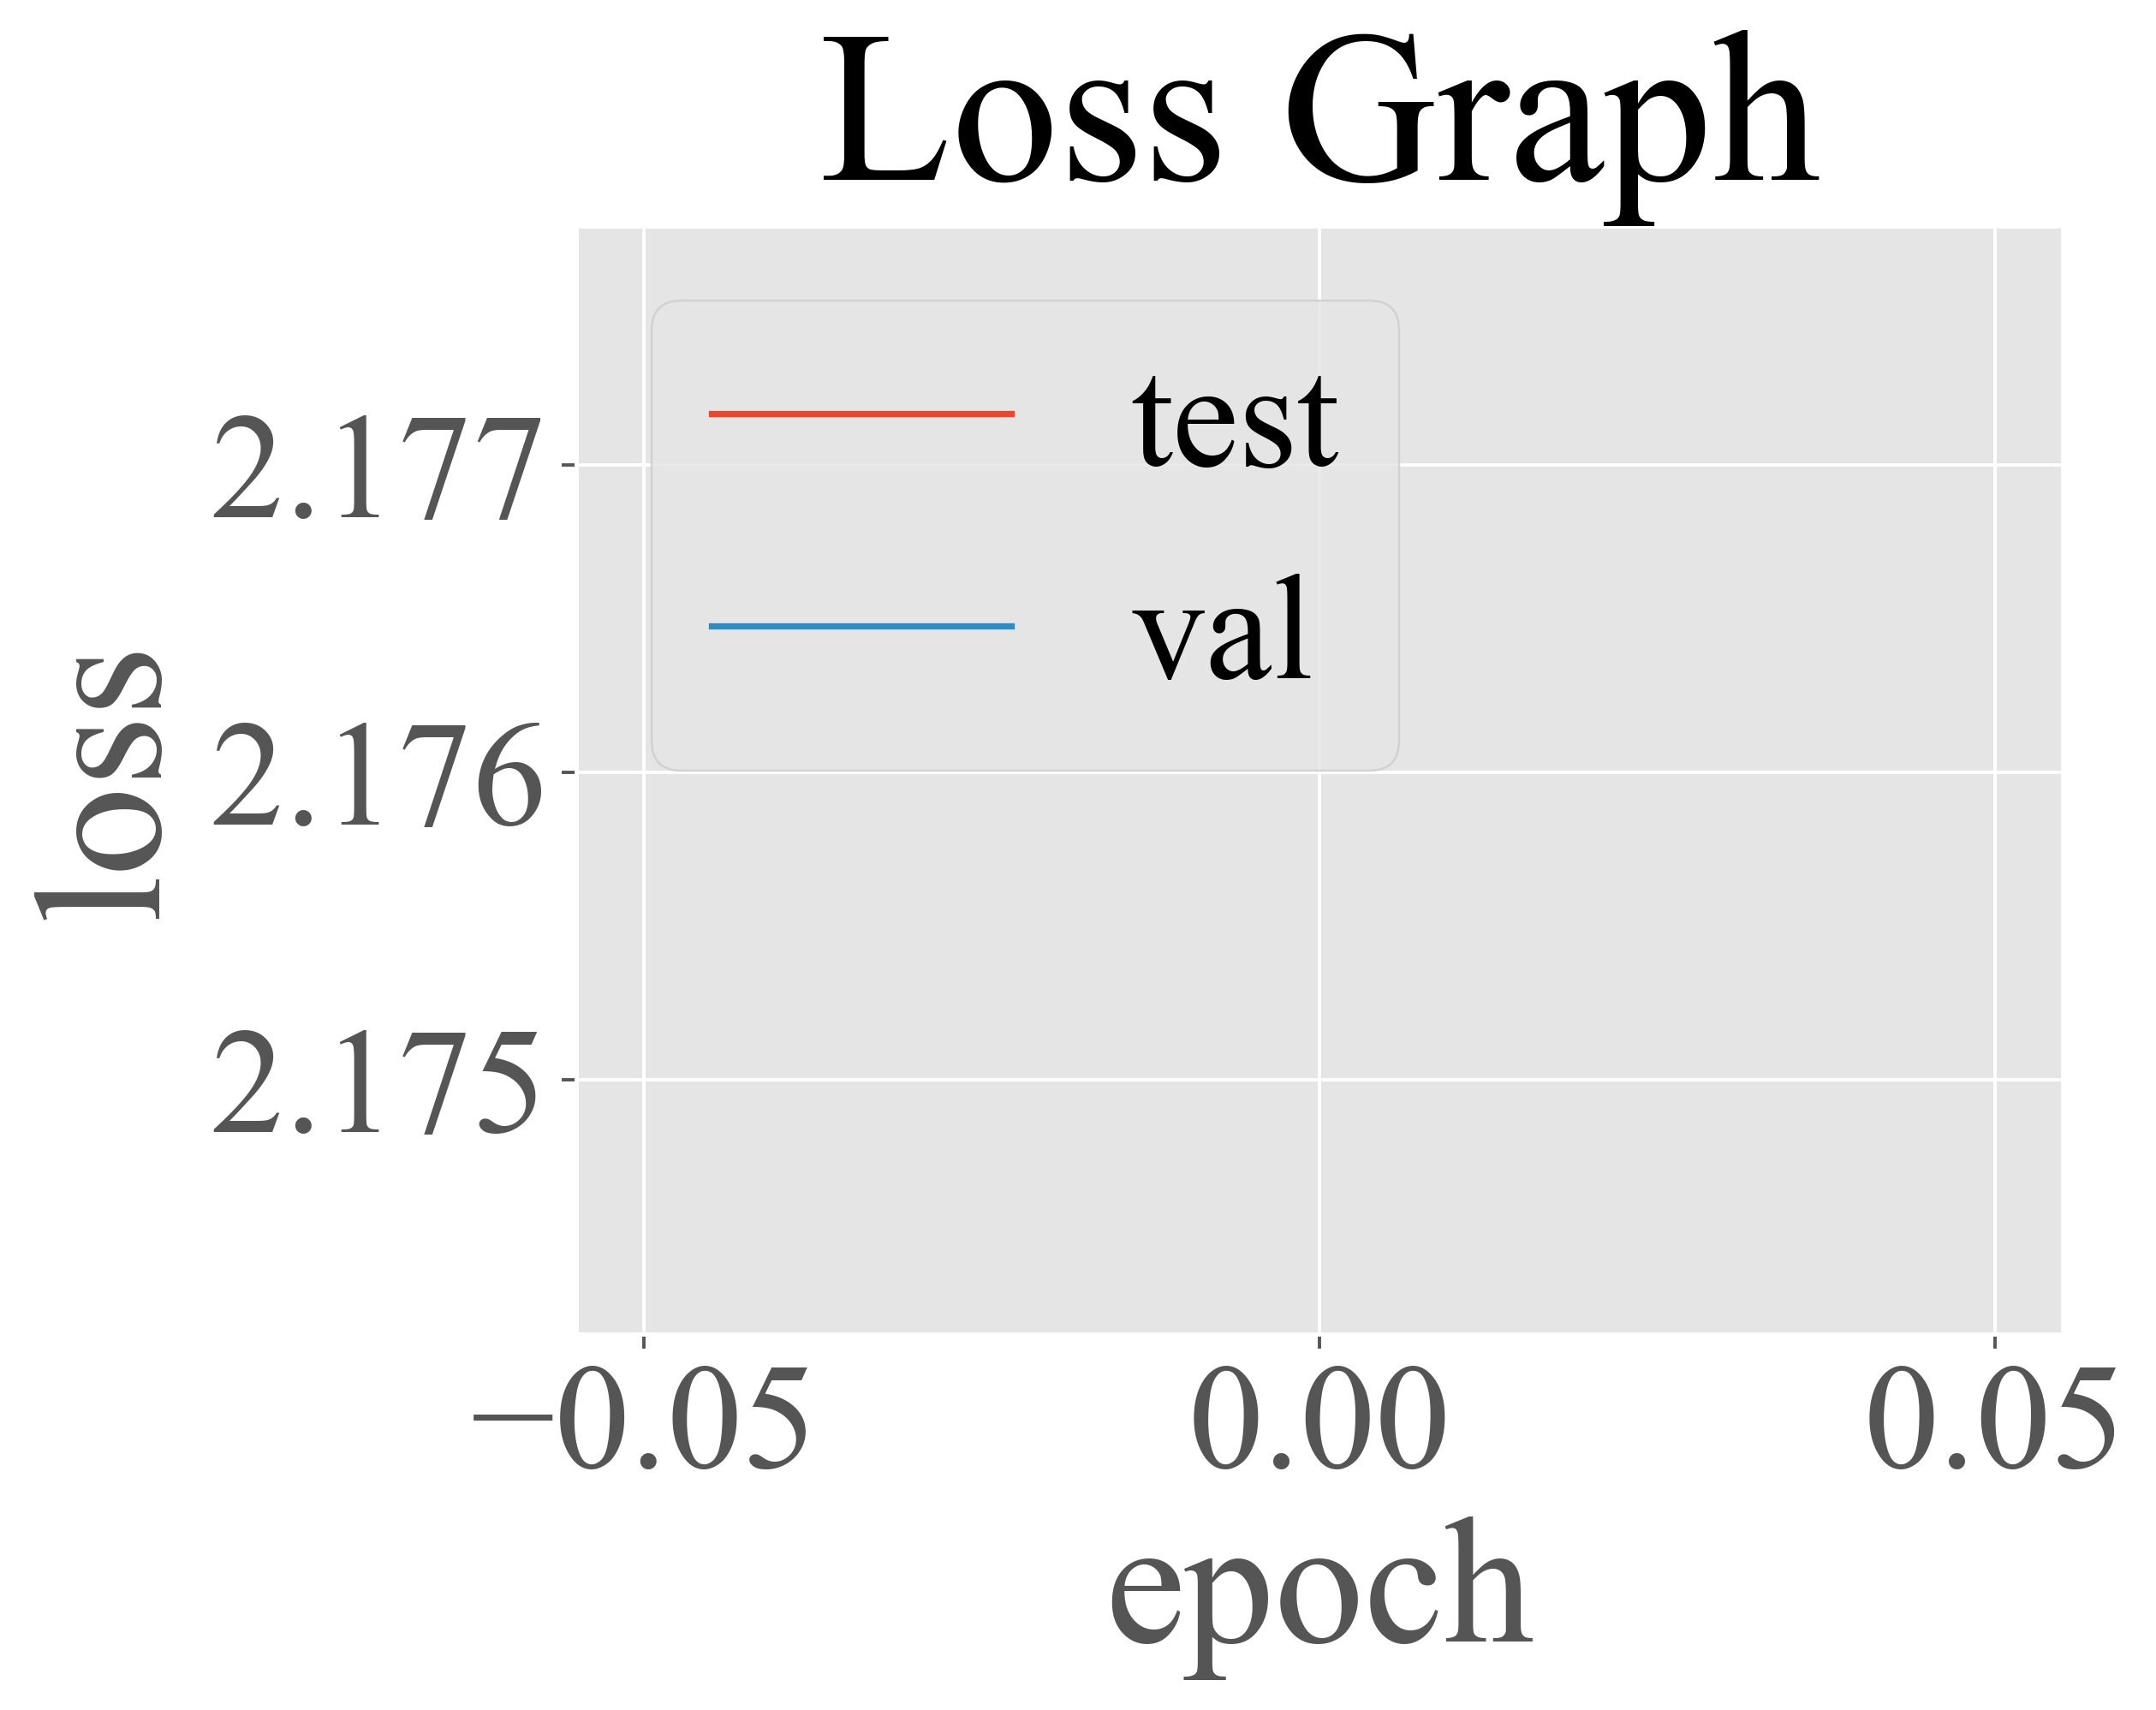

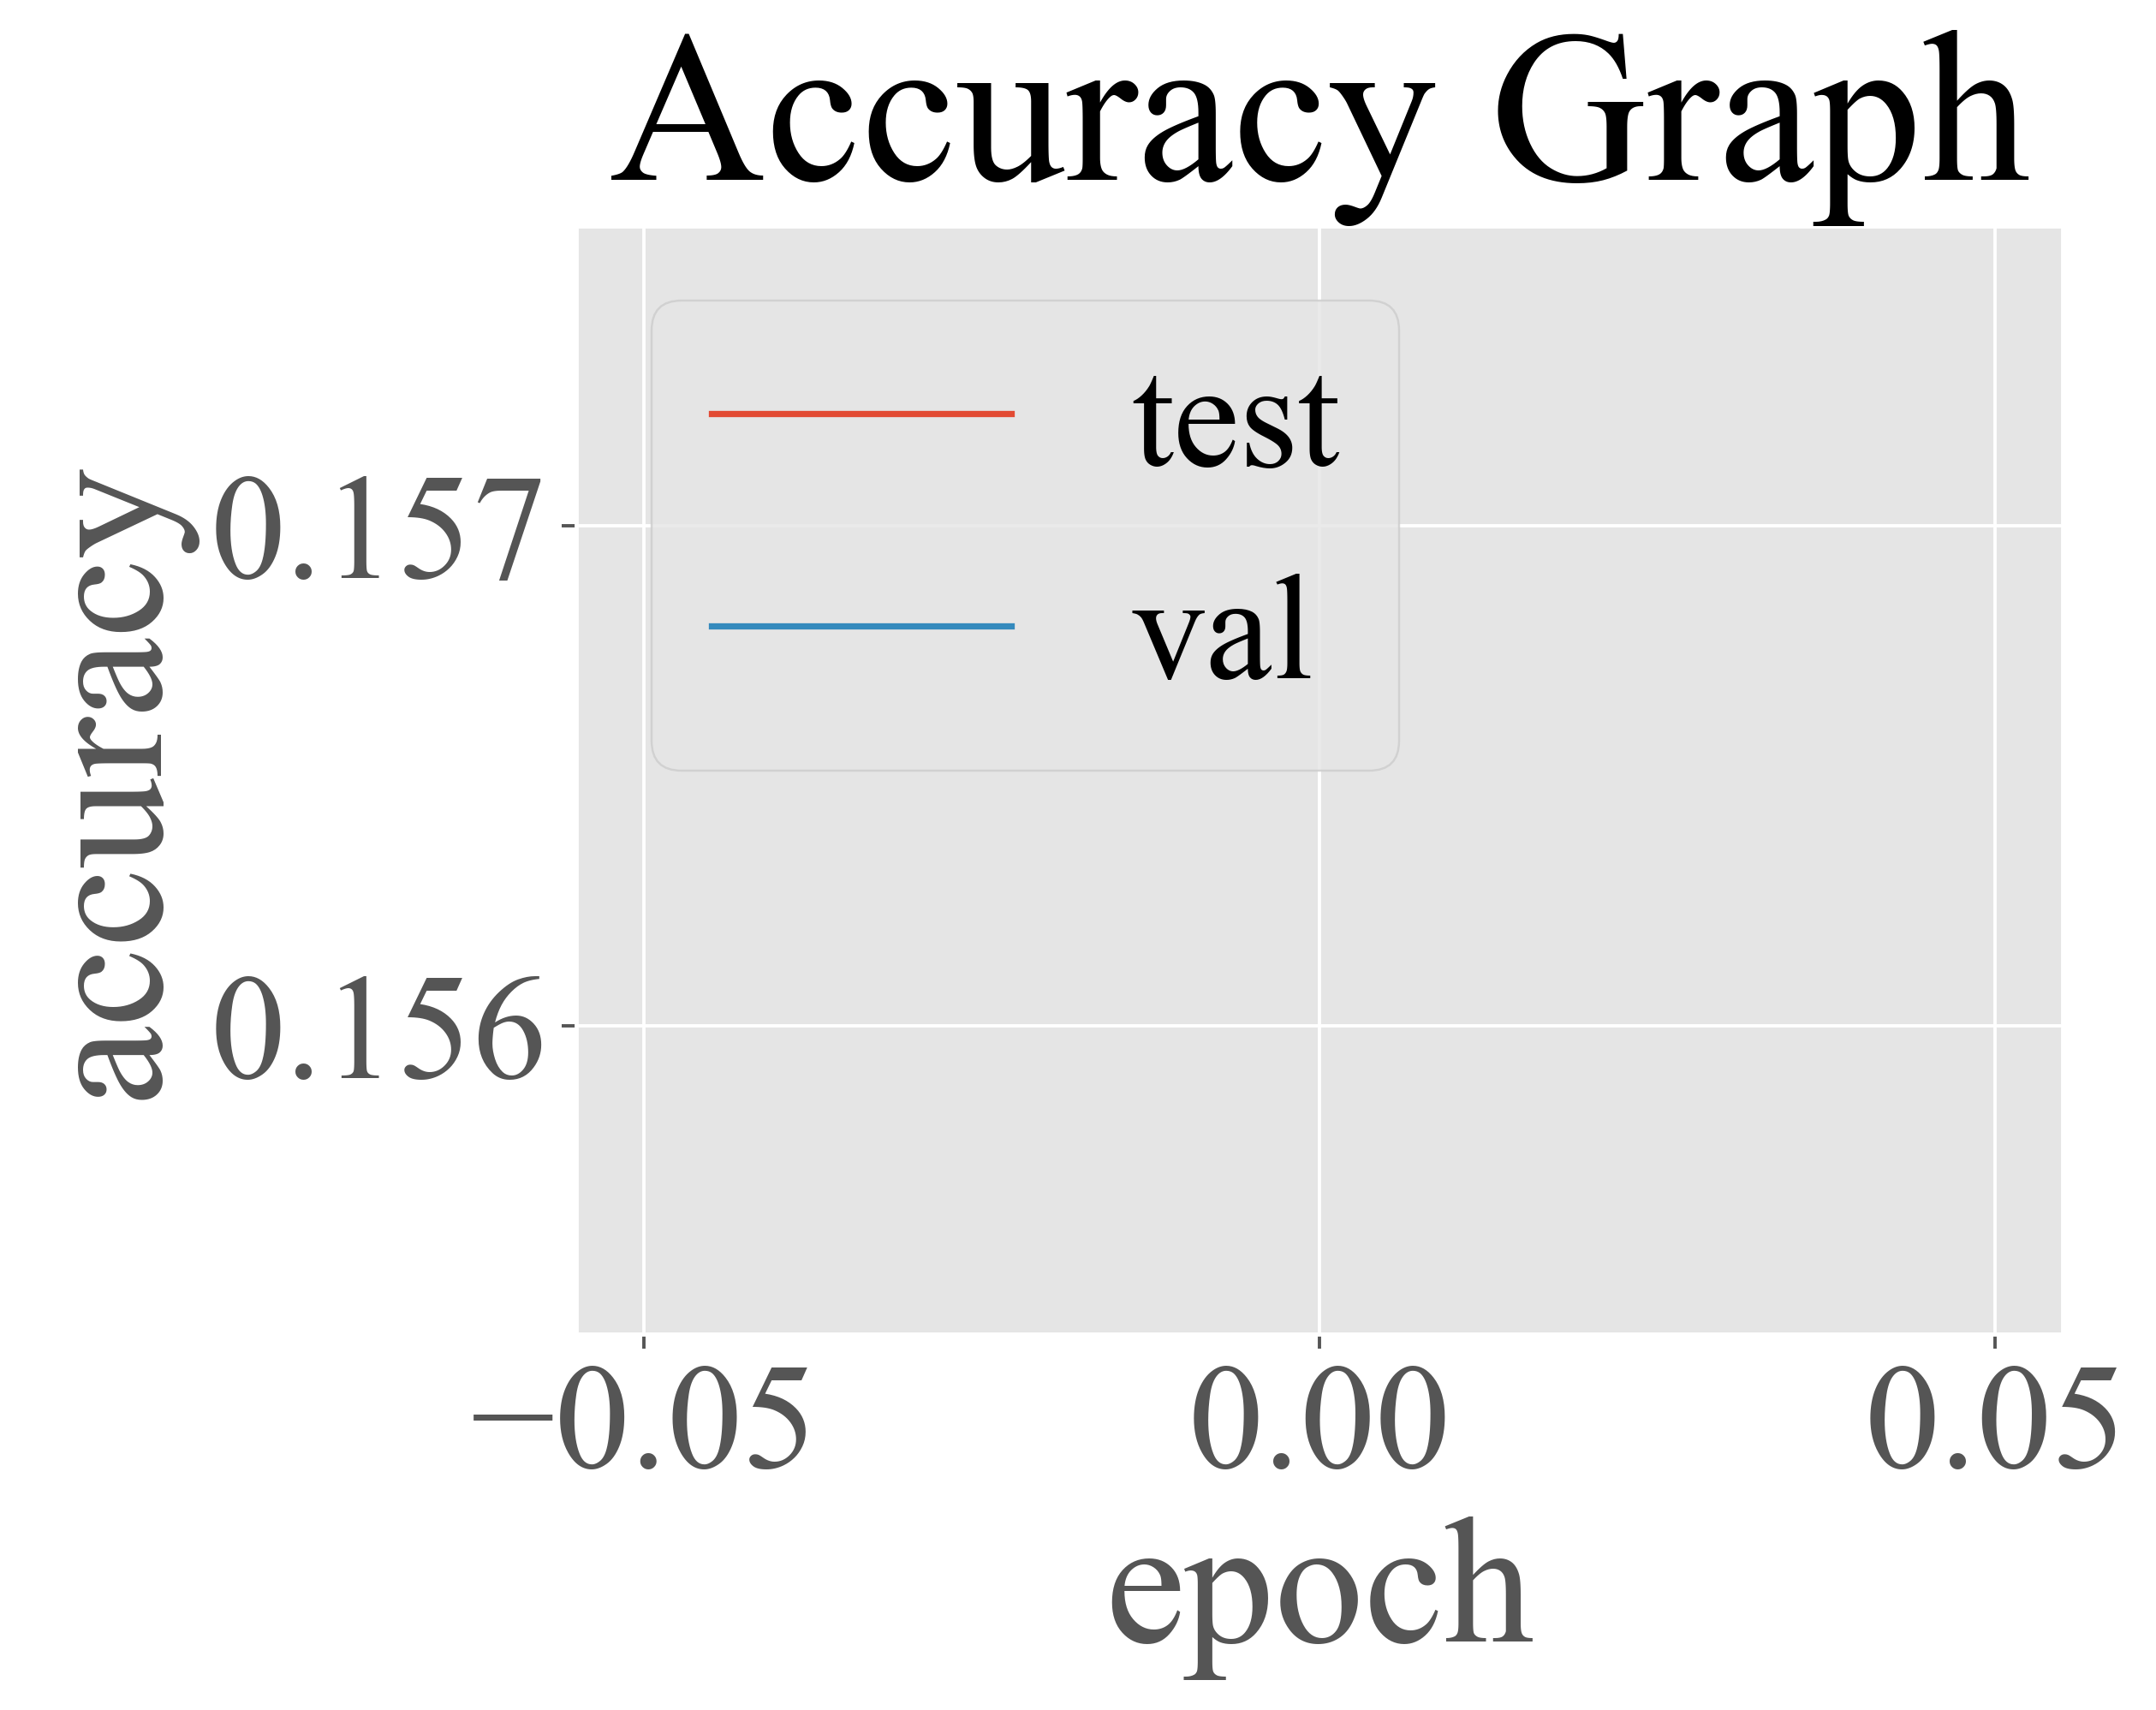

In [ ]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])


plt_data = [history.history['class_pearson'], history.history['val_class_pearson']]
plot_line_graph(plt_data, "class_pearson Graph", 'class_pearson', 'epoch', ['train', 'val'])

plt_data = [history.history['accuracy'], history.history['val_accuracy']]
plot_line_graph(plt_data, "accuracy Graph", 'accuracy', 'epoch', ['train', 'val'])

plt_data = [history.history['kullback_leibler_divergence'], history.history['val_kullback_leibler_divergence']]
plot_line_graph(plt_data, "kullback_leibler_divergence Graph", 'kullback_leibler_divergence', 'epoch', ['train', 'val'])

plt_data = [history.history['class_pearson'], history.history['val_class_pearson']]
plot_line_graph(plt_data, "class_pearson Graph", 'class_pearson', 'epoch', ['train', 'val'])




In [ ]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)